<a href="https://colab.research.google.com/github/kpenzo/rag_example/blob/main/Copy_of_Introducci%C3%B3n_y_Fundamentos_del_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt_tab')  #model multilingue

In [ ]:
!unrar x "/content/sample_data/reviews_dataframe_completo.rar"

In [23]:
csv_path = "/content/sample_data/reviews_dataframe_completo.csv"
original_data = pd.read_csv(csv_path)

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='stars', data=original_data)
plt.title('Distribución de las Estrellas')
plt.show()

In [24]:
original_data.head(3)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore


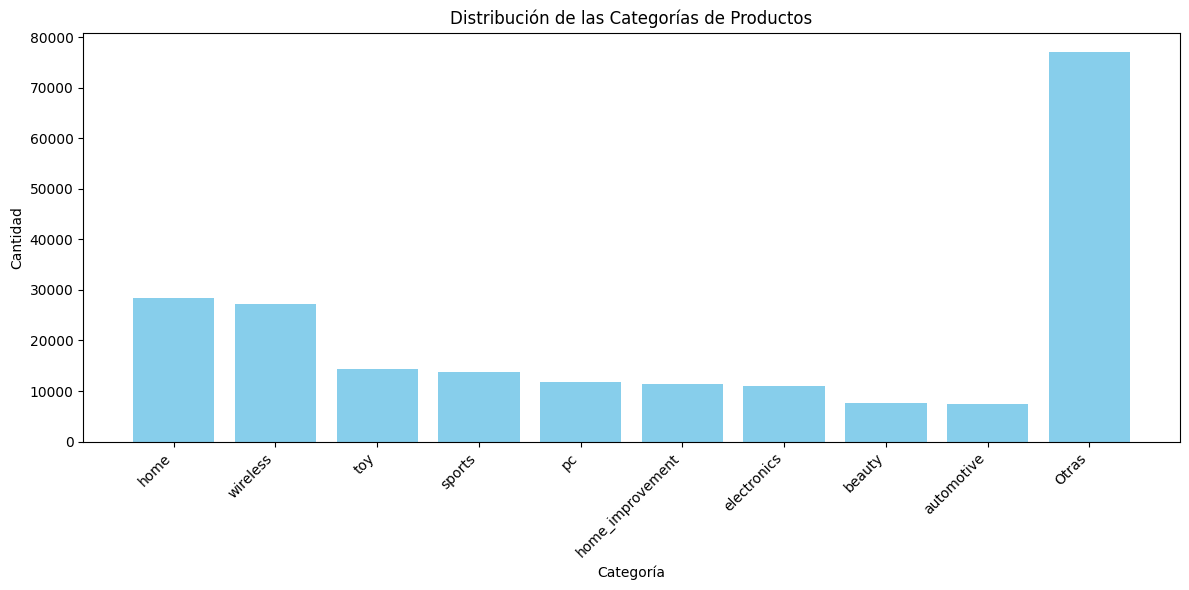

In [25]:
product_category = original_data['product_category'].value_counts()
if len(product_category) > 10:
    top_categories = product_category.iloc[:9].copy()
    other_categories = product_category.iloc[9:].sum()
    top_categories['Otras'] = other_categories
else:
    top_categories = product_category

categories = top_categories.index
values = top_categories.values

plt.figure(figsize=(12,6))
plt.bar(categories, values, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Distribución de las Categorías de Productos')
plt.tight_layout()
plt.show()

In [ ]:
plt.scatter(categories, values, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.figure(figsize=(12,6))
plt.show()

In [ ]:
plt.bar(categories, values, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.figure(figsize=(12,6))
plt.show()

In [ ]:
plt.plot(categories, values)
plt.xticks(rotation=45, ha="right")
plt.show()

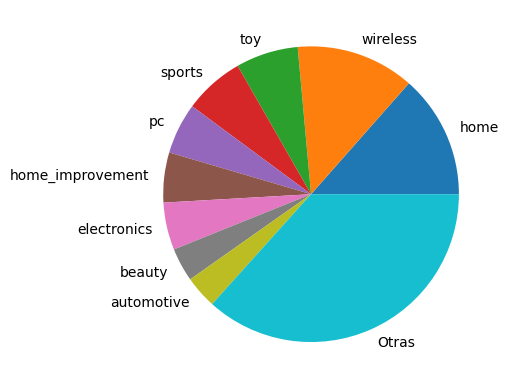

In [12]:
plt.figure()
plt.pie(values, labels=categories)
plt.show()

                PREPOCESAMIENTO INICIAL Y LIMPIEZA DEL TEXTO

In [38]:
filter_data = original_data[["review_body", "stars"]].copy()
filter_data.isnull().sum()    #evaluar valores nulos

,0
review_body,0
stars,0


In [14]:
import re
import string

In [49]:
def clean(text):
  text = str(text).lower()    #convertir a minusculas
  text = re.sub(r'\[.*?\]', '', text)    #eliminar textos entre corchetes
  text = re.sub(r'https?://\S+|www\.\S+', '', text)    #eliminar urls
  text = re.sub(r'<.*?>+', '', text)  #eliminar etiquetas HTML
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)    #eliminar signos de puntuacion
  text = re.sub(r'\n', ' ', text)   #eliminar los saltos de linea
  text = re.sub(r'\w*\d\w*', '', text)    #eliminar palabras con numeros
  text = re.sub(r'[^\x00-\x7F]+', '', text)   #eliminar caracter not ascii
  text = text.strip()
  return text

In [50]:
filter_data["clean_review"] = filter_data["review_body"].apply(clean)
filter_data[['review_body', 'clean_review']].head(3)

,review_body,clean_review
0,Nada bueno se me fue ka pantalla en menos de 8...,nada bueno se me fue ka pantalla en menos de ...
1,"Horrible, nos tuvimos que comprar otro porque ...",horrible nos tuvimos que comprar otro porque n...
2,Te obligan a comprar dos unidades y te llega s...,te obligan a comprar dos unidades y te llega s...


In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt_tab')  #model multilingue

In [51]:
sample_text = filter_data["clean_review"].iloc[0]
print("Texto de ejemplo: ", sample_text)

Texto de ejemplo:  nada bueno se me fue ka pantalla en menos de  meses y no he recibido respuesta del fabricante


    TOKENIZACIÓN Y SEGMENTACIÓN
     

In [52]:
tokens_nltk = word_tokenize(sample_text, language='spanish')
sentences_nltk = sent_tokenize(sample_text, language='spanish')
print(tokens_nltk)
print(sentences_nltk)

['nada', 'bueno', 'se', 'me', 'fue', 'ka', 'pantalla', 'en', 'menos', 'de', 'meses', 'y', 'no', 'he', 'recibido', 'respuesta', 'del', 'fabricante']
['nada bueno se me fue ka pantalla en menos de  meses y no he recibido respuesta del fabricante']


In [53]:
import spacy

In [ ]:
!python3 -m spacy download es_core_news_sm

In [55]:
nlp_es = spacy.load('es_core_news_sm')
doc_es = nlp_es(sample_text)

In [56]:
tokens_spacy = [token.text for token in doc_es]
sentences_spacy = [sent.text for sent in doc_es.sents]

In [57]:
print(tokens_spacy)
print(sentences_spacy)

['nada', 'bueno', 'se', 'me', 'fue', 'ka', 'pantalla', 'en', 'menos', 'de', ' ', 'meses', 'y', 'no', 'he', 'recibido', 'respuesta', 'del', 'fabricante']
['nada bueno se me fue ka pantalla en menos de  meses y no he recibido respuesta del fabricante']


In [58]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [60]:
nltk.download('stopwords')
stopword_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stemmer_es = SnowballStemmer('spanish')
sample_text = filter_data["clean_review"].iloc[0]

tokens_nltk = word_tokenize(sample_text, language='spanish')
print("Tokens", tokens_nltk)

tokens_no_stop = [token for token in tokens_nltk if token not in stopword_es]
print("Tokens sin stopwords", tokens_no_stop)

stemmed_tokens = [stemmer_es.stem(token) for token in tokens_no_stop]
print("Tokens Stemming", stemmed_tokens)

doc_es = nlp_es(sample_text)
lemmatized_tokens = [token.lemma_ for token in doc_es if token.text.lower() not in stopword_es]
print("Tokens Lematizacion", lemmatized_tokens)

In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
text = " ".join(review for review in filter_data["clean_review"])
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, width=800, height=800).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras - Reseñas Limpias")
plt.show()

In [63]:
def clean_with_stopwords_and_stemming(text):
  text = " ".join(token for token in text.split() if token not in stopword_es)
  text = " ".join([stemmer_es.stem(token) for token in text.split()])
  return text.strip()

In [ ]:
filter_data["clean_review_stemming"] = filter_data["clean_review"].apply(clean_with_stopwords_and_stemming)
filter_data[['clean_review', 'clean_review_stemming']].head(3)

In [ ]:
text = " ".join(review for review in filter_data["clean_review_stemming"])
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, width=800, height=800).generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras - Reseñas Limpias + Stopwords + Stemming")
plt.show()

In [66]:
def clean_with_stopwords_and_lemmatization(text):
  doc = nlp_es(text)
  lemmatized = [token.lemma_ for token in doc if token.text.lower() not in stopword_es]
  return " ".join(lemmatized).strip()

In [73]:
filter_data["clean_review_lemmatization"] = filter_data["clean_review"].apply(clean_with_stopwords_and_lemmatization)
filter_data[['clean_review', 'clean_review_lemmatization']].head(3)

,clean_review,clean_review_lemmatization
0,nada bueno se me fue ka pantalla en menos de ...,bueno ko pantallar menos mes recibir respues...
1,horrible nos tuvimos que comprar otro porque n...,horrible comprar saber ingls informtico despus...
2,te obligan a comprar dos unidades y te llega s...,obligar comprar dos unidad llegar solo forma r...


In [ ]:
text = " ".join(review for review in filter_data["clean_review_lemmatization"])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600).generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras - Reseñas Limpias + Stopwords + Lematizacion")
plt.show()

In [75]:
filter_data[["clean_review_lemmatization", "stars"]].to_csv("reviews_clean_advanced.csv", index=False)